# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

In [1]:
!gdown -O data.zip https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link --fuzzy

Downloading...
From: https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw
To: c:\Users\Sadi\Desktop\trash\innopolis\nlp\assignments\assignment1\data.zip

  0%|          | 0.00/15.6k [00:00<?, ?B/s]
100%|██████████| 15.6k/15.6k [00:00<00:00, 1.11MB/s]


In [5]:
with open('data/file2', 'r') as f:
    cnt = 0
    for l in f:
        print(l)
        cnt += 1
        if cnt > 10:
            break

Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

Its american tradition bitch

@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

Hey doll! Great I missed True Blood yday boo lol Rt @Fra

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [7]:
# reading the file2 from the data.zip

data = []
with open('data/file2', 'r') as f:
    data = f.readlines()

data[:15]

['Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com\n',
 'Its american tradition bitch\n',
 "@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones\n",
 '" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"\n',
 "Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m\n",
 "@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.\n",
 'iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki\n',
 'RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!\n',
 "RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI\n",
 'Hey dol


    1. Input tweet: Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com\n
    1. Tokenized tweet: Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com , \n
    
    2. Input tweet: Its american tradition bitch\n
    2. Tokenized tweet: Its , american , tradition , bitch , \n
    
    3. Input tweet: @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones\n
    3. Tokenized tweet: @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones , \n

    4. Input tweet: " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"\n
    4. Tokenized tweet: " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , -, -, - , " , " , I tweet because I , \ , ' , m happy , , , I , tweet , because , I , \ , ', m , free , " , " , LOL , ! , ", \n

    5. Input tweet: Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m\n
    5. Tokenized tweet: Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , ., . , http://tinyurl.com/lb5p6m , \n

    6. Input tweet: @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.\n
    6. Tokenized tweet: @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , . , \n

    7. Input tweet: iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki\n
    7. Tokenized tweet: iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki , \n

    8. Input tweet: RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!\n
    8. Tokenized tweet: RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25 , MB , http://bit.ly/62mjw , Nice , ! , ! , ! , \n

    9. Input tweet: RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI\n
    9. Tokenized tweet: RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI , \n

    10. Input tweet: Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)\n
    10. Tokenized tweet: Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-) , \n

    11. Input tweet: Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland\n
    11. Tokenized tweet: Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland , \n

    12. Input tweet: @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both\n
    12. Tokenized tweet: @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . Can , ' , t , do , both , \n

    13. Input tweet: Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv\n
    13. Tokenized tweet: Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv , \n

    14. Input tweet: Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)\n
    14. Tokenized tweet: Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , ) , \n

    15. Input tweet: Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk\n
    15. Tokenized tweet: Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , 'corporate' , taalgebruik , . , . , . , Best , vreemd , eigenlijk , \n

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [44]:
from typing import List

from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt', quiet=True)

class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the BPETokenizer class.

        Args:
            vocab_size (int): The desired size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.vocab = []

        self.word_freq = defaultdict(int)
        self.merges = {}
        self.splits = {}

    def train(self, corpus: List[str]) -> None:
        """
        Train the BPETokenizer on the given corpus.

        Args:
            corpus (List[str]): The list of sentences to train the tokenizer on.
        """
        # split sentences into individual tokens and calculate word frequency
        for text in corpus:
            tokens = self.get_words(text)
            for token in tokens:
                self.word_freq[token] += 1
        
        # build self.vocab
        for word in self.word_freq:
            for c in word:
                if not c in self.vocab:
                    self.vocab.append(c)
            
            self.splits[word] = [c for c in word]

        self.vocab.insert(0, '</w>')

        # get most freq pair and add it to the vocab
        while len(self.vocab) < self.vocab_size:
            pairs = self.get_pair_freq()

            best = None
            best_freq = 0
            for pair, freq in pairs.items():
                if best is None or best_freq < freq:
                    best = pair
                    best_freq = freq
            
            if best is None:
                continue

            # add best to the vocab
            self.vocab.append((best[0] + best[1]))
            self.merge_pair(best[0], best[1])
            self.merges[best] = best[0] + best[1]

        # empty memory
        del self.splits

    def merge_pair(self, a, b):
        """
        Merge a pair of characters in all the words in the vocabulary.

        Args:
            a (str): The first character of the pair.
            b (str): The second character of the pair.
        """
        for word in self.word_freq:
            split = self.splits[word]
            i = 0
            while i < len(split)-1:
                if split[i] == a and split[i+1] == b: # merge them
                    split = split[:i] + [a + b] + split[i+2:]
                else:
                    i += 1           
             
            self.splits[word] = split


    def get_pair_freq(self):
        """
        Calculate the frequency of all character pairs in the vocabulary.

        Returns:
            dict: A dictionary containing the frequency of each character pair.
        """
        pairs = defaultdict(int)
        for word, freq in self.word_freq.items():
            split = self.splits[word]
            for i in range(len(split)-1):
                pairs[(split[i], split[i + 1])] += freq
        return pairs


    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize the given text using the trained BPETokenizer.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            List[str]: The list of tokens generated from the input text.
        """
        tokens = self.get_words(text)
        tokens = [[c for c in token] for token in tokens]

        for pair, merged in self.merges.items():
            for i in range(len(tokens)):
                token = tokens[i]

                j = 0
                while j < len(token)-1:
                    if token[j] == pair[0] and token[j+1] == pair[1]:
                        token = token[:j] + [merged] + token[j+2:]
                    else:
                        j += 1
                tokens[i] = token
        
        res = []
        for token in tokens:
            res.extend(token)
        
        return res


    def get_words(self, sent: str) -> list[str]:
        """
        Tokenize the given sentence into individual words.

        Args:
            sent (str): The input sentence to be tokenized.

        Returns:
            list[str]: The list of words generated from the input sentence.
        """
        return word_tokenize(sent)
    

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [45]:
import os
def get_data(root='data', files=['file1', 'file2', 'file3', 'file4', 'file5']):
    data = []
    for file in files:
        path = os.path.join(root, file)
        with open(path, 'r') as f:
            data.extend(f.readlines())
    
    return data

In [57]:
data = get_data()

average_length = []
vocab_sizes = [100, 250, 500, 750, 1000]
for vocab_size in vocab_sizes:
    bpe = BPETokenizer(vocab_size=vocab_size)
    bpe.train(data)
    
    tokenized = []
    for sent in data:
        tokenized.extend(bpe.tokenize(sent))
    
    lengths = [len(t) for t in tokenized]
    average_length.append(sum(lengths) / len(lengths))


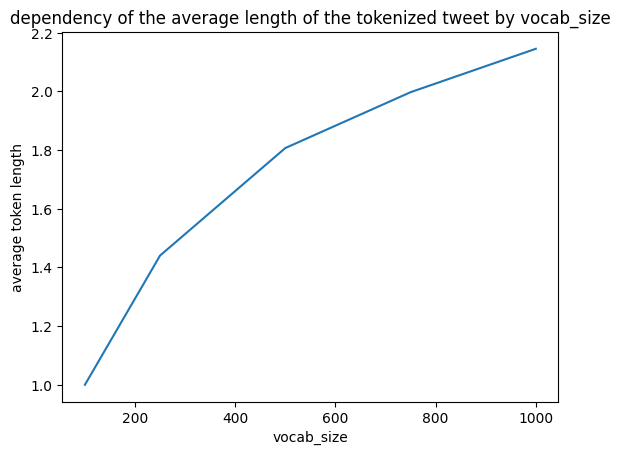

In [67]:
import matplotlib.pyplot as plt

plt.plot(vocab_sizes, average_length)
plt.title('dependency of the average length of the tokenized tweet by vocab_size')
plt.xlabel('vocab_size')
plt.ylabel('average token length')
plt.show()

## I'd prefer to use 750 or 1000 vocab_size, because they cover more words from corpus

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [69]:
data = get_data(root='.', files=['russian_poems.txt'])

In [73]:
data[:10]

['Александр Пушкин\n',
 '19 ОКТЯБРЯ\n',
 'Роняет лес багряный свой убор,\n',
 'Сребрит мороз увянувшее поле,\n',
 'Проглянет день как будто поневоле\n',
 'И скроется за край окружных гор.\n',
 'Пылай, камин, в моей пустынной келье;\n',
 'А ты, вино, осенней стужи друг,\n',
 'Пролей мне в грудь отрадное похмелье,\n',
 'Минутное забвенье горьких мук.\n']

In [81]:
# remove \n from the end and lower the text
data = [text.lower()[:-1] for text in data]

In [82]:
bpe = BPETokenizer(vocab_size=1000)
bpe.train(data)

In [85]:
bpe.tokenize('он не пришел, кудрявый наш певец')

['он', 'не', 'при', 'шел', ',', 'ку', 'д', 'ря', 'вый', 'наш', 'пе', 'ве', 'ц']

In [89]:
average_length = []
vocab_sizes = [100, 250, 500, 750, 1000, 2000, 5000]
for vocab_size in vocab_sizes:
    bpe = BPETokenizer(vocab_size=vocab_size)
    bpe.train(data)
    
    tokenized = []
    for sent in data[:2000]:
        tokenized.extend(bpe.tokenize(sent))
    
    lengths = [len(t) for t in tokenized]
    average_length.append(sum(lengths) / len(lengths))

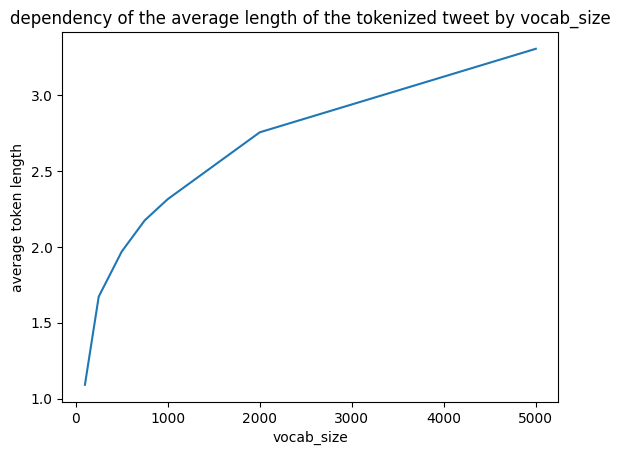

In [91]:
import matplotlib.pyplot as plt

plt.plot(vocab_sizes, average_length)
plt.title('dependency of the average length of the tokenized tweet by vocab_size')
plt.xlabel('vocab_size')
plt.ylabel('average token length')
plt.show()

In [93]:
# bpe with vocab_size=5000
bpe.tokenize('он не пришел, кудрявый наш певец')

['он', 'не', 'пришел', ',', 'ку', 'д', 'ря', 'вый', 'наш', 'пе', 'вец']

## The averaged length of tokenized text is the same as tweet dataset, because BPE algorithm is independent of language. And since english and russian languages have same method of writting (letters) their average length is almost the same.

### Since `russian_poems.txt` is > 3.3k sentences it's better to get larger vocab_size. As we can see from the plot 5k vocab_size is not enough, because average length is growing fast as we increase vocab_size.